# **Project 1 Report**

Muhammed Ayaan Muhammed Moinuddin

CS658

## **P1-1. Curse of Dimensionality**

**(a) Generate 1000 points following a uniform distribution under a given dimension, and then compute difference between max and min distance between any pair of points. Hint: Refer to the tutorial “Introduction to Numpy and Pandas” on how to generate random points.**

In [1]:
#Import the required libraries
import numpy as np #Used for data manipulation and numerical computations

#Function to generate the random points
def random_points(no_of_points, dimension):
    return np.random.rand(no_of_points, dimension)

#Function to calculate the Euclidean distances between the points
def distance_between_points(points):
    no_of_points = len(points)
    distances = []
    for i in range(no_of_points):
        for j in range(i + 1, no_of_points):
            dist = np.linalg.norm(points[i] - points[j])
            distances.append(dist)
    return distances

#The main function that controls everything.
def main():
    points = 1000 #number of random points to be generated
    dimensions = 11 #dimensions can be any number. 
    rand_points = random_points(points, dimensions)
    distances = distance_between_points(rand_points)
    #Calculate the maximum and minimum distances between the points
    max_distance = max(distances) 
    min_distance = min(distances)
    #Calculate the difference between max and min distances
    difference = max_distance - min_distance
    print("Maximum Distance:", max_distance)
    print("Minimum Distance:", min_distance)
    print("Difference:", difference)    

if __name__ == "__main__":
    main()


Maximum Distance: 2.354689836346004
Minimum Distance: 0.34409320113288655
Difference: 2.0105966352131173


**(b) Repeat (a) for different dimensions from 2 to 50.**

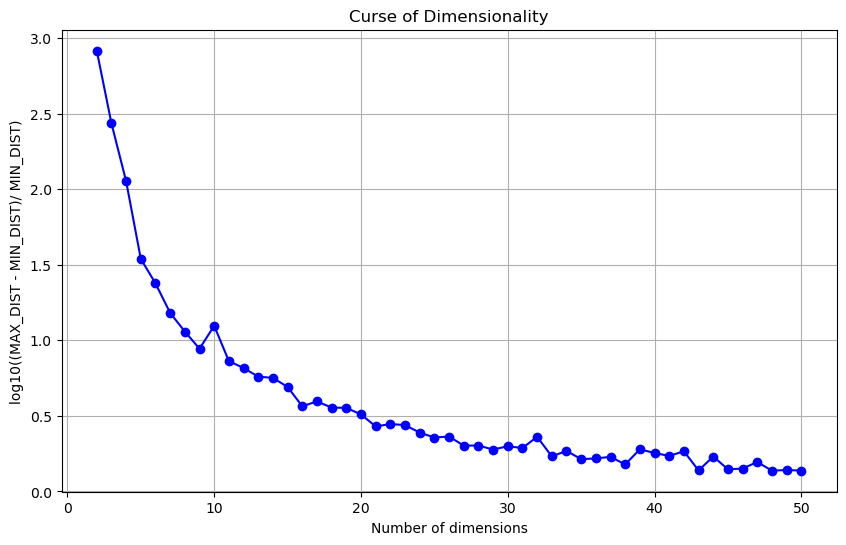

In [2]:
#Import the required libraries
import numpy as np #Used for data manipulation and numerical computations
import matplotlib.pyplot as plt #Used for creating visual plots

#Function to generate random points
def random_points(no_of_points, dimension):
    return np.random.rand(no_of_points, dimension)

#Function to calculate Euclidean distances between the points
def distance_between_points(points):
    no_of_points = len(points)
    distances = []
    for i in range(no_of_points):
        for j in range(i + 1, no_of_points):
            dist = np.linalg.norm(points[i] - points[j])
            distances.append(dist)
    return distances

#The main function that controls everything.
def main():
    points = 1000 #Number of random points to be generated
    dimensions = list(range(2, 51))  #Dimensions from 2 to 50
    
    logs = []

    for dim in dimensions:
        rand_points = random_points(points, dim)
        distances = distance_between_points(rand_points)
        #Calculate the maximum and minimum distances between the points
        max_distance = max(distances)
        min_distance = min(distances)
        #Calculate log_10(max-min)/min under different number of dimensions.
        log = np.log10((max_distance - min_distance) / min_distance)
        logs.append(log)

    #To Create a figure
    plt.figure(figsize=(10, 6))
    
    #To Plot the dimension vs. log10((max-min)/min)
    plt.plot(dimensions, logs, marker='o', linestyle='-', color='b')
    plt.title('Curse of Dimensionality')
    plt.xlabel('Number of dimensions')
    plt.ylabel('log10((MAX_DIST - MIN_DIST)/ MIN_DIST)')
    plt.grid(True)
    
    #To Show the figure
    plt.show()

if __name__ == "__main__":
    main()

Plot log_10(max-min)/min under different number of dimensions. 

# **P1-2. The Iris Dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)**

**(a) Data Visualization. Duplicate the following figure using scatter plot.**

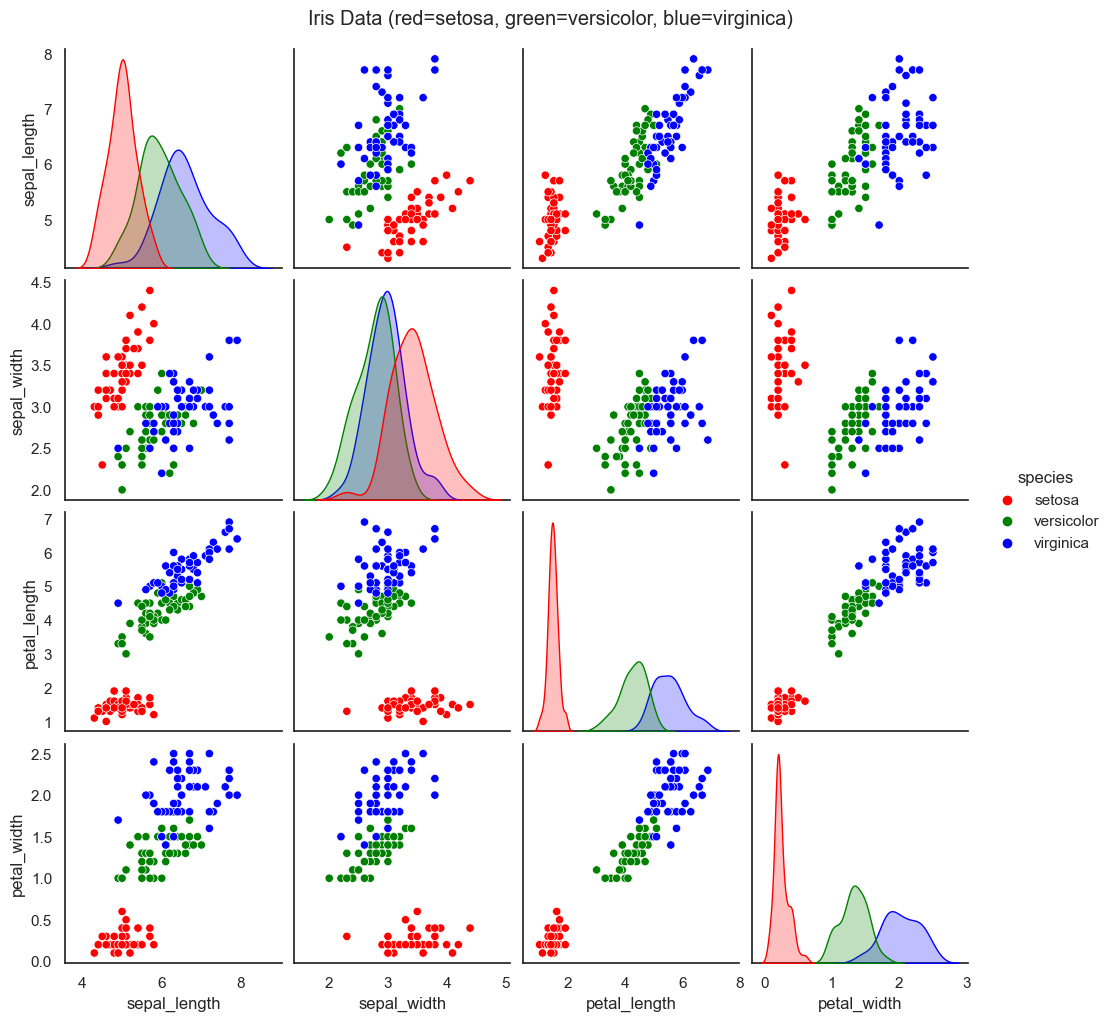

In [3]:
#Import the required libraries
from sklearn import datasets #Used to load the Iris dataset
iris = datasets.load_iris()
import seaborn as sns #Used or data visualization
import matplotlib.pyplot as plt #Used for creating visual plots

#Load the Iris dataset using seaborn
iris = sns.load_dataset("iris")

#Create scatterplot matrix using seaborn
sns.set(style="white")
sns.pairplot(iris, hue="species", palette={"setosa": "red", "versicolor": "green", "virginica": "blue"})

#To set the title
plt.suptitle("Iris Data (red=setosa, green=versicolor, blue=virginica)", y=1.02)

#To show the plot
plt.show()

**(b) Find the best discretization for the petal length and the petal width that can best separate the Iris data and plot a figure similar to the figure in slide 54 in Chapter 2. For each flower type, list in a table how many data samples are correctly separated and how many are not correctly separated.**

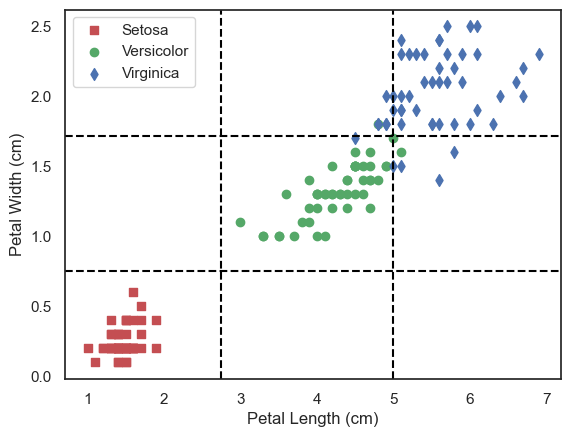

Flower Type      Correctly Seperated    Not Correct Seperated
-------------  ---------------------  -----------------------
Setosa                            50                        0
Versicolor                        48                        2
Virginica                         40                       10


In [4]:
#Import the required libraries
import numpy as np #Used for data manipulation and numerical computations
import matplotlib.pyplot as plt #Used for creating visual plots
from sklearn.datasets import load_iris #Used to load the Iris dataset
from tabulate import tabulate #Used to create a table for result comparison

#Load the Iris dataset
iris = load_iris()
data = iris.data # Features (sepal length, sepal width, petal length, petal width)
target = iris.target # Target variable (species: 0 - Setosa, 1 - Versicolour, 2 - Virginica)

#To Set the Threshold
thresholds = {'length1': 2.75, 'length2': 5.0,'width1': 0.75,'width2': 1.72}

#Initializing the counters for separating the correct and incorrect data samples for different species of flower
correct = {'setosa': 0, 'versicolor': 0, 'virginica': 0}
not_correct = {'setosa': 0, 'versicolor': 0, 'virginica': 0}

#To Iterate through the dataset and classify the data samples based on thresholds declared above
for i in range(len(data)):
    petal_length, petal_width = data[i][2], data[i][3]
    true_label = iris.target_names[target[i]].lower()  # Convert to lowercase for consistency
    
    # Check if the data point is correctly classified
    if (
        petal_length <= thresholds['length1'] and petal_width <= thresholds['width1'] and
        true_label == 'setosa'
    ):
        correct['setosa'] += 1
    elif (
        petal_length >= thresholds['length1'] and petal_width >= thresholds['width1'] and
        petal_length <= thresholds['length2'] and petal_width <= thresholds['width2'] and
        true_label == 'versicolor'
    ):
        correct['versicolor'] += 1
    elif (
        petal_length >= thresholds['length2'] and petal_width >= thresholds['width2'] and
        true_label == 'virginica'
    ):
        correct['virginica'] += 1
    else:
        not_correct[true_label] += 1

#To Visualize the results with a scatter plot
plt.scatter(data[target == 0][:, 2], data[target == 0][:, 3], label='Setosa', color='r', marker='s')
plt.scatter(data[target == 1][:, 2], data[target == 1][:, 3], label='Versicolor', color='g', marker='o')
plt.scatter(data[target == 2][:, 2], data[target == 2][:, 3], label='Virginica', color='b', marker='d')

#To Plot the threshold lines
plt.axvline(x=thresholds['length1'], color='black', linestyle='--')
plt.axhline(y=thresholds['width1'], color='black', linestyle='--')
plt.axvline(x=thresholds['length2'], color='black', linestyle='--')
plt.axhline(y=thresholds['width2'], color='black', linestyle='--')

#To Add the legend and labels
plt.legend()
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

#To Show the plot
plt.show()

#To Print the results in a table
results_table = [['Setosa', correct['setosa'], not_correct['setosa']],
                 ['Versicolor', correct['versicolor'], not_correct['versicolor']],
                 ['Virginica', correct['virginica'], not_correct['virginica']]]

headers = ['Flower Type', 'Correctly Seperated', 'Not Correctly Seperated']

print(tabulate(results_table, headers))


Discuss your results here.

The above table shows that the outcome depends on the specific threshold values selected. Adjusting the threshold values can significantly impact the number of correct and incorrect classifications for each species. Experimenting with different threshold values and evaluating the classification performance using metrics would be a next step in refining this approach.

# **P1-3. Principal Component Analysis for The Iris Dataset**

**(a) Use the Iris dataset and plot all the samples in a figure using Sepal Length and Sepal Width, i.e., xlabel('Sepal length') and ylabel('Sepal width').**

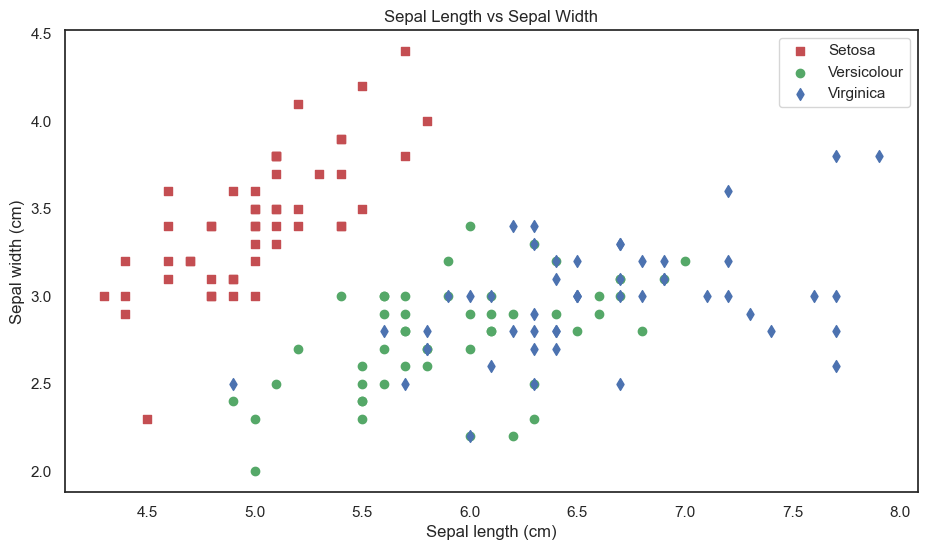

In [5]:
#Import the required libraries
import matplotlib.pyplot as plt #Used for creating visual plots
from sklearn.datasets import load_iris #Used to load the Iris dataset

#Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species: 0 - Setosa, 1 - Versicolour, 2 - Virginica)

#Plot Sepal Length vs Sepal Width
#To Visualize the results with a scatter plot
plt.figure(figsize=(11, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Setosa', c='r', marker='s')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Versicolour', c='g', marker='o')
plt.scatter(X[y == 2, 0], X[y == 2, 1], label='Virginica', c='b', marker='d')
#To Add the legend and labels
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
#To Show the plot
plt.show()

**(b)The Iris dataset has 4 attributes (sepal length, sepal width, petal length, and petal width). Use PCA to reduce the dimension of the dataset from 4 to 2. Plot all the samples after the dimensionality reduction in a 2D figure. Compare this figure with the figure in (a) and discuss whether you can better separate the data samples after the dimensionality reduction.**

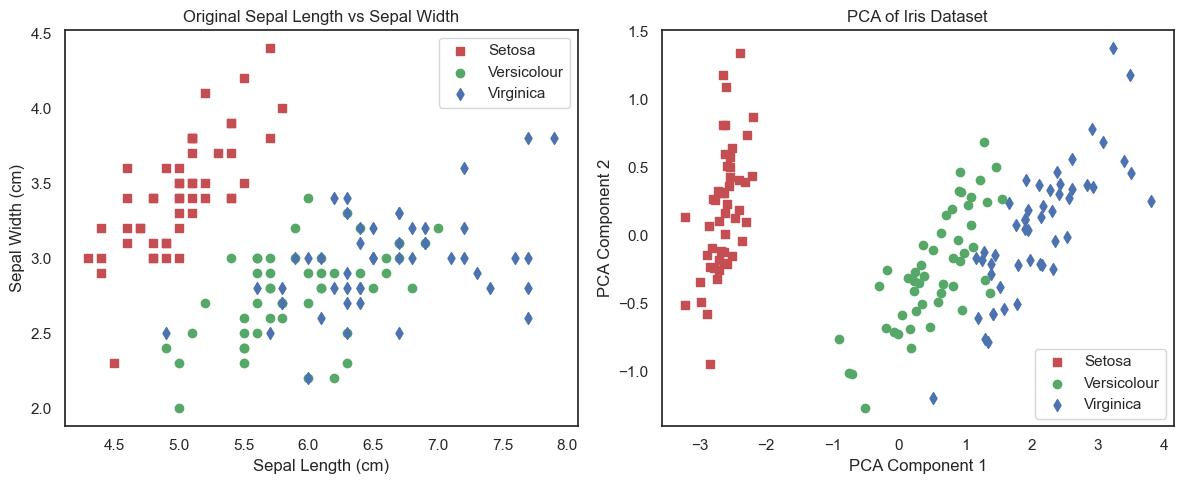

In [6]:
#Import the required libraries 
import numpy as np #Used for data manipulation and numerical computations
import matplotlib.pyplot as plt #Used for creating visual plots
from sklearn import datasets #Used to load the Iris dataset
from sklearn.decomposition import PCA #Used to imports the Principal Component Analysis which is used for dimensionality reduction

#To load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species: 0 - Setosa, 1 - Versicolour, 2 - Virginica)

#To apply PCA to reduce dimensionality from 4 to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#To Create a scatter plot of the data after PCA
plt.figure(figsize=(12, 5))

#Subplot 1: Original Sepal Length vs Sepal Width
#To Visualize the results with a scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Setosa', c='r', marker='s')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Versicolour', c='g', marker='o')
plt.scatter(X[y == 2, 0], X[y == 2, 1], label='Virginica', c='b', marker='d')
#To Add the legend and labels
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Original Sepal Length vs Sepal Width')
plt.legend(loc='best')

#Subplot 2: PCA result
#To Visualize the results with a scatter plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label='Setosa', c='r', marker='s')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label='Versicolour', c='g', marker='o')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], label='Virginica', c='b', marker='d')
#To Add the legend and labels
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(loc='best')
plt.tight_layout()
#To Show the plot
plt.show()

Discuss your results here.

In Subplot 1 (Original Sepal Length vs Sepal Width), we can see the original data distribution. The three species of iris flowers are represented by different colors and markers. It shows how the data points are distributed based on the sepal length and sepal width features.

In Subplot 2 (PCA of Iris data), we see the same data, but it has been transformed using PCA to two dimensions. The data points are now distributed along the two principal components, capturing the most significant variation in the data. While the species are still visually distinguishable, the separation is not as clear as in Subplot 1.

In conculsion, PCA has reduced the dimensionality of the data while retaining most of the essential information. This visualization allows you to compare the original feature space with the reduced-dimensional space to assess how well PCA captures the underlying structure of the Iris dataset.